<a href="https://colab.research.google.com/github/mihir0804/Cognifyz_Technologies_internship_task/blob/main/Cognifyz_Technologies_internship_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

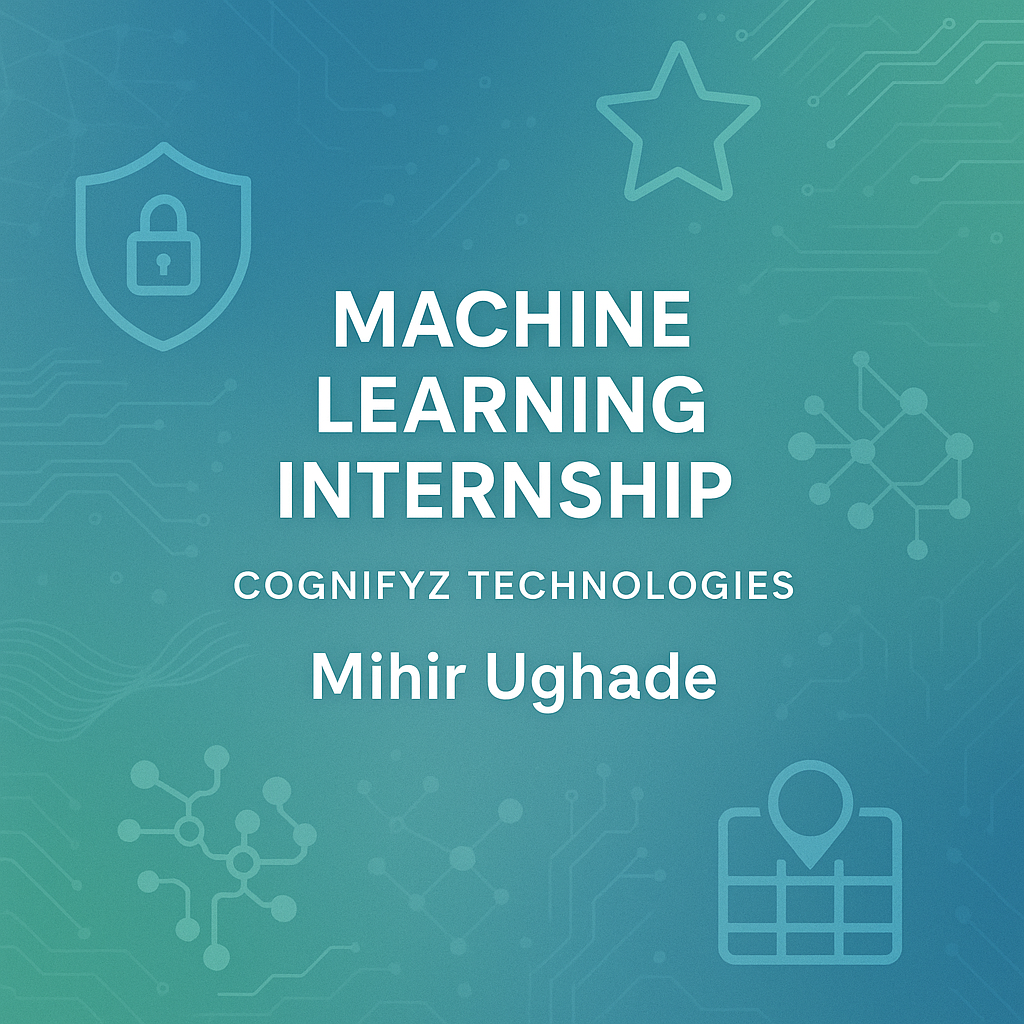

# Cognifyz Technologies – Machine Learning Internship

**Internship Domain:** Machine Learning  
**Intern Name:** Mihir Milind Ughade  
**Email:** mihirughade0804@gmail.com  
**LinkedIn:** [mihir-ughade-00601223a](https://www.linkedin.com/in/mihir-ughade-00601223a/)  
**GitHub:** [mihir0804](https://github.com/mihir0804)

---

## Notebook Overview
This notebook contains the implementation of three tasks completed as part of the Machine Learning Internship at Cognifyz Technologies. Each task applies machine learning and data analysis techniques on restaurant-related data.

### Selected Tasks

**Task 1: Predict Restaurant Ratings (Regression)**  
Objective: Build a machine learning regression model to predict the aggregate rating of a restaurant based on features such as cuisines, price range, votes, and location.

**Task 2: Restaurant Recommendation System (Content-Based Filtering)**  
Objective: Develop a recommendation system that suggests similar restaurants based on user input using TF-IDF vectorization and cosine similarity.

**Task 4: Location-Based Restaurant Analysis (Geospatial Insights)**  
Objective: Perform a geographic analysis of restaurants using city, latitude, and longitude data, and visualize key patterns including restaurant density, rating distribution, and cuisine diversity across cities.

---

## Tools and Libraries Used
Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Folium, Gradio, TF-IDF

**Note:** All three tasks are implemented within this single notebook. A PDF report has been prepared separately for documentation and review.


# **Task1:-Predict Restaurant Ratings**

In [ ]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [ ]:
# Importing Data using Pandas Function
df = pd.read_csv('/content/Dataset .csv')
# if file csv uplond in
# It will print Shuffle 100% Dataset
df.sample(frac = 1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4697,306662,Green Chick Chop,1,New Delhi,"Shop 12, Old Market, Ramesh Nagar, Near Kirti ...",Kirti Nagar,"Kirti Nagar, New Delhi",77.132106,28.649796,"Raw Meats, North Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,2.7,Orange,Average,23
4267,18419901,P.S. Chinese & Thai Food,1,New Delhi,"155, Bhagwan Nagar Chowk, Jangpura, New Delhi",Jangpura,"Jangpura, New Delhi",77.258520,28.579112,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
8798,18144457,Haaochi,1,Noida,"Gurukripa Bhawan, Sector 53, Noida",Sector 53,"Sector 53, Noida",77.363174,28.587847,Chinese,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.5,Yellow,Good,123
9014,310240,Cream Bell,1,Noida,"F-74, Sector 8, Noida",Sector 8,"Sector 8, Noida",77.322795,28.596049,Ice Cream,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
7575,310279,South Indian Hut,1,New Delhi,"21/24, Main Road, Near Central Hospital, Tilak...",Tilak Nagar,"Tilak Nagar, New Delhi",77.088922,28.637823,"South Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,18386203,Bakeyard,1,New Delhi,26A South Anarkali Extension Opposite Communit...,Krishna Nagar,"Krishna Nagar, New Delhi",0.000000,0.000000,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,6
1425,18138446,Burger Point,1,Gurgaon,"Shop 4, Near Genpact, DLF Phase 5, Gurgaon",DLF Phase 5,"DLF Phase 5, Gurgaon",77.097812,28.449530,"Burger, Fast Food",...,Indian Rupees(Rs.),No,Yes,No,No,1,3.6,Yellow,Good,39
3145,18261700,King Bikaneri,1,New Delhi,"3/5, Asaf Ali Road, Daryaganj, New Delhi",Daryaganj,"Daryaganj, New Delhi",77.234139,28.641540,"North Indian, Chinese, Fast Food, South Indian",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,6
2238,312708,Tea Halt,1,Gurgaon,"Food Court, Basement, Amenity Block, Unitech I...","Unitech Infospace, Sector 21, Gurgaon","Unitech Infospace, Sector 21, Gurgaon, Gurgaon",77.071511,28.509779,Cafe,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.7,Orange,Average,14


In [ ]:
# Checking Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,12,2,2,2,1,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8652,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000


## **Dataset Summary:**
**Rows: 9,551**

**Target Variable: Aggregate rating (float, 0 to 4.9)**

**Key Features Available:**

**Average Cost for two, Votes, Price range**

**Categorical: Cuisines, City, Currency, Has Table booking, Has Online delivery**

**Geolocation: Latitude, Longitude**

**Missing Values:**

**Only in Cuisines (9 missing rows)**

In [ ]:
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Step 2: Drop irrelevant columns
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose', 'Switch to order menu'], axis=1)

In [ ]:
# Fill missing 'Cuisines' with mode
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

## **Clean & Preprocess**

In [ ]:
# Select target and features
target = 'Aggregate rating'
features = ['Country Code', 'City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
            'Currency', 'Has Table booking', 'Has Online delivery', 'Price range', 'Votes']

X = df[features]
y = df[target]

## **Encode & Split**

In [ ]:
# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# OneHot Encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='passthrough'
)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Train Models**

In [ ]:
# Linear Regression Pipeline
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Decision Tree Regressor
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

## **Evaluation**

In [ ]:
def evaluate(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}")

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Decision Tree", y_test, y_pred_dt)

Linear Regression - MSE: 1.4194, R²: 0.3764
Decision Tree - MSE: 0.1542, R²: 0.9322


# **Task 2: Restaurant Recommendation System**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("/content/Dataset .csv")

# Preview
df[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Price range']].head()

,Restaurant Name,Cuisines,Average Cost for two,Price range
0,Le Petit Souffle,"French, Japanese, Desserts",1100,3
1,Izakaya Kikufuji,Japanese,1200,3
2,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,4
3,Ooma,"Japanese, Sushi",1500,4
4,Sambo Kojin,"Japanese, Korean",1500,4


## **Data Cleaning & Prep**

In [ ]:
# Drop rows with missing 'Cuisines'
df = df.dropna(subset=['Cuisines'])

# Reset index for clean results
df.reset_index(drop=True, inplace=True)

# We'll use 'Cuisines' + 'Price range' to create recommendation vectors
df['Cuisines'] = df['Cuisines'].str.lower().str.replace(", ", " ")  # clean text for TF-IDF
df['Profile'] = df['Cuisines'] + " " + df['Price range'].astype(str)

## **TF-IDF Vectorization**

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Profile'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## **Recommendation Function**

In [ ]:
def recommend_restaurants(name, top_n=5):
    try:
        idx = df[df['Restaurant Name'].str.lower() == name.lower()].index[0]
    except IndexError:
        return f"Restaurant '{name}' not found."

    scores = list(enumerate(cosine_sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in scores[1:top_n+1]]

    return df[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Price range']].iloc[top_indices]

# Example:
recommend_restaurants("Ooma")

,Restaurant Name,Cuisines,Average Cost for two,Price range
71,Kawa Sushi,sushi japanese,120,4
182,Tokyo Sushi,japanese sushi,25,2
212,Fuji Japanese Steakhouse,japanese sushi,40,3
244,Osaka,japanese sushi,40,3
257,Miyabi 9,japanese sushi,25,2


# **Gradio-Based Restaurant Recommendation UI**

## **install Gradio**

In [ ]:
pip install gradio

## **interactive restaurant recommender will be Gradio**

In [ ]:
import gradio as gr

# Define Gradio interface function
def recommend_interface(restaurant_name):
    try:
        idx = df[df['Restaurant Name'].str.lower() == restaurant_name.lower()].index[0]
    except IndexError:
        return f"Restaurant '{restaurant_name}' not found in dataset."

    scores = list(enumerate(cosine_sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in scores[1:6]]

    recommendations = df[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Price range']].iloc[top_indices]
    return recommendations.to_string(index=False)

# Create Gradio interface
demo = gr.Interface(
    fn=recommend_interface,
    inputs=gr.Textbox(lines=1, placeholder="Enter a restaurant name (e.g., Ooma)"),
    outputs="text",
    title="Restaurant Recommendation System",
    description="Get top 5 similar restaurants based on cuisine and price range."
)

# Launch the app
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://388ccccacd35dc9ed8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Task 4: Location-Based Analysis**

In [ ]:
import folium

# Check required columns
df[['City', 'Latitude', 'Longitude', 'Aggregate rating', 'Cuisines', 'Price range']].head()


,City,Latitude,Longitude,Aggregate rating,Cuisines,Price range
0,Makati City,14.565443,121.027535,4.8,french japanese desserts,3
1,Makati City,14.553708,121.014101,4.5,japanese,3
2,Mandaluyong City,14.581404,121.056831,4.4,seafood asian filipino indian,4
3,Mandaluyong City,14.585318,121.056475,4.9,japanese sushi,4
4,Mandaluyong City,14.584450,121.057508,4.8,japanese korean,4


In [ ]:
# Drop rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Optional: Filter to only valid ratings
df = df[df['Aggregate rating'] > 0]

# Reset index
df.reset_index(drop=True, inplace=True)

## **Plot Restaurants on Map (Using Folium)**

In [ ]:
# Create a base map centered on India
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Plot 500 restaurants for visibility
for i in range(min(500, len(df))):
    folium.CircleMarker(
        location=[df.loc[i, 'Latitude'], df.loc[i, 'Longitude']],
        radius=3,
        popup=f"{df.loc[i, 'Restaurant Name']} - {df.loc[i, 'Aggregate rating']}",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(map)

# Display the map
map

## **City-Level Insights-1**

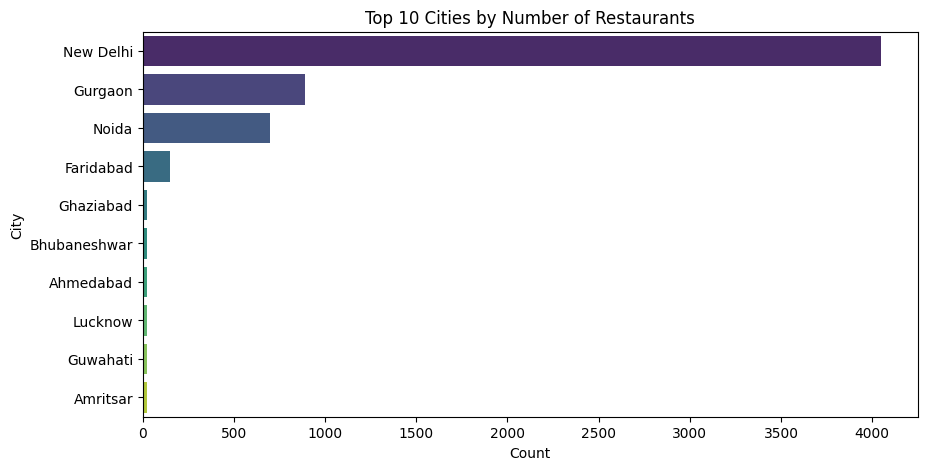

In [ ]:
# Number of restaurants by city
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Count")
plt.show()

## **City-Level Insights-2**

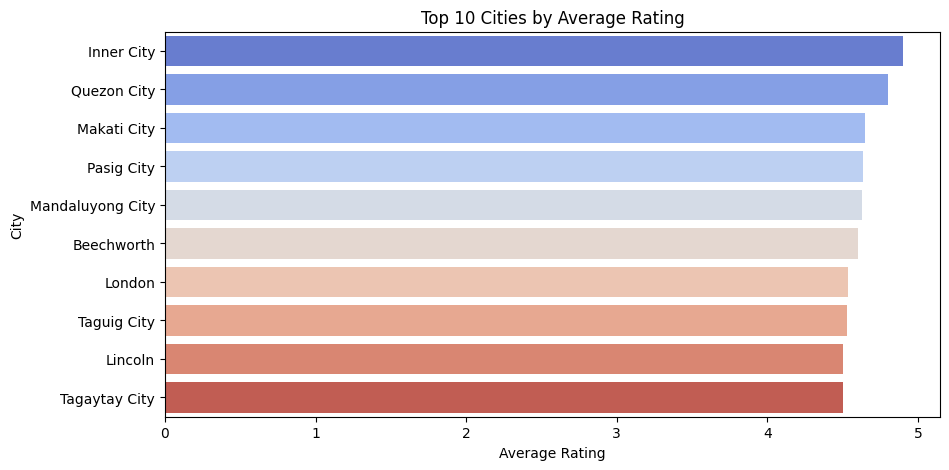

In [ ]:
# Average rating by city
avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="coolwarm")
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.show()

## **Cuisines by City Heatmap**

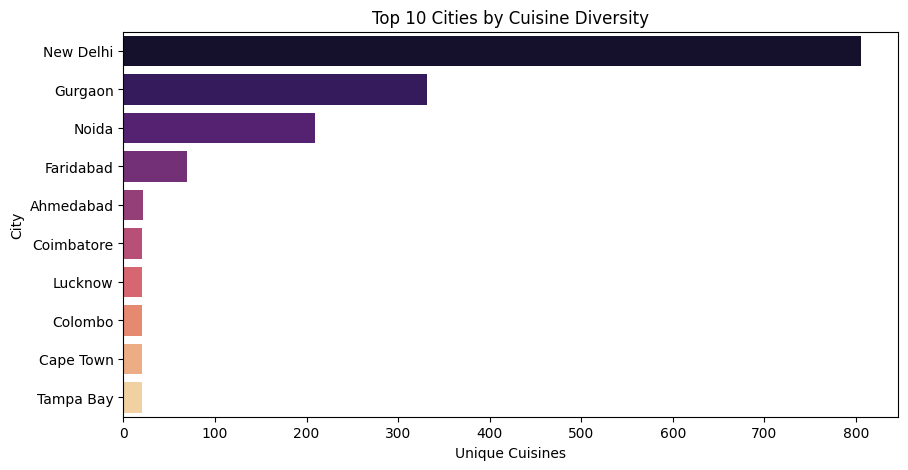

In [ ]:
# Count of cuisines by city
cuisine_counts = df.groupby('City')['Cuisines'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="magma")
plt.title("Top 10 Cities by Cuisine Diversity")
plt.xlabel("Unique Cuisines")
plt.show()